In [1]:
import pandas as pd

data = pd.read_csv("one_hot_encoded_data.csv", index_col=[0])

In [2]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,...,debt_settlement_flag_N,debt_settlement_flag_Y,settlement_status_ACTIVE,settlement_status_BROKEN,settlement_status_COMPLETE,settlement_status_No,next_pymnt_d_Apr-2019,next_pymnt_d_Feb-2019,next_pymnt_d_Mar-2019,next_pymnt_d_Unkown
0,10000.0,10000.0,10000.0,4.0,307.27,10.0,55000.0,Current,19.22,0.0,...,1,0,0,0,0,1,0,0,1,0
1,35000.0,35000.0,35000.0,18.0,770.63,10.0,200000.0,Current,17.80,1.0,...,1,0,0,0,0,1,0,0,1,0
2,9600.0,9600.0,9600.0,8.0,300.13,3.0,90000.0,Current,25.59,1.0,...,1,0,0,0,0,1,0,0,1,0
3,18000.0,18000.0,18000.0,6.0,557.52,10.0,70000.0,Current,5.55,0.0,...,1,0,0,0,0,1,0,0,1,0
4,12000.0,12000.0,12000.0,10.0,378.59,3.0,36500.0,Current,33.61,0.0,...,1,0,0,0,0,1,0,0,1,0


In [3]:
X = data.drop(columns=["loan_status"])
y = data["loan_status"]

# data["loan_status"] = data["loan_status"].astype("category")
# category = data["loan_status"].cat.categories

# y = data["loan_status"].cat.codes

In [4]:
print("y.unique() is ", y.unique())
# category
# category[y]

y.unique() is  ['Current' 'Fully Paid' 'Late (31-120 days)' 'Late (16-30 days)'
 'In Grace Period' 'Charged Off' 'Default']


#### Xgboost manages only numeric vectors.
https://xgboost.readthedocs.io/en/latest/R-package/discoverYourData.html


In [5]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)



gbm0 = GradientBoostingClassifier(random_state=666)
gbm0.fit(X_train, y_train)
y_pred = gbm0.predict(X_test)
y_predprob = gbm0.predict_proba(X)[:,1]

c:\users\guo\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [6]:
print("Accuracy : %.4g" % accuracy_score(y_test, y_pred))

Accuracy : 0.9893


# confusion matrix Sifan-version

In [7]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test, y_pred, labels=y.unique())

In [8]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [9]:
plot_confusion_matrix(cm1,y.unique())

%matplotlib inline

<Figure size 800x600 with 2 Axes>

# Confusion Matrix mingyang version

Confusion matrix, without normalization
[[  103     0     0     1     0     0     0]
 [    0 23546     0     0     8     2     6]
 [    0     1     0     0     0     0     0]
 [    0     0     0  1470     0     0     0]
 [    0   141     0     0     5     1     6]
 [    0    49     0     0     3     1    11]
 [    0    43     0     0     2     0   240]]


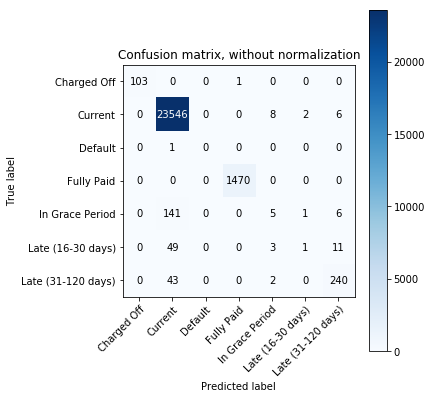

In [12]:
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
import numpy as np

def plot_confusion_matrix(y_true, y_pred, fig_name,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(6,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    fig.savefig(fig_name)
    return ax

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix


plot_confusion_matrix(y_test, y_pred, 
                      title='Confusion matrix, without normalization',fig_name='confusion matrix GBDT.png')

plt.show()

# ROC Curves

In [13]:
from sklearn.preprocessing import label_binarize
y_test = label_binarize(y_test, classes=['Charged Off','Current','Default','Fully Paid','In Grace Period','Late (16-30 days)','Late (31-120 days)'])

In [14]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
clf = OneVsRestClassifier(GradientBoostingClassifier())
y_score = clf.fit(X_train, y_train).decision_function(X_test)


fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


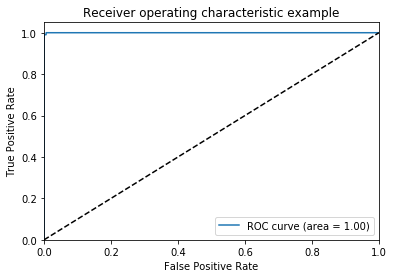

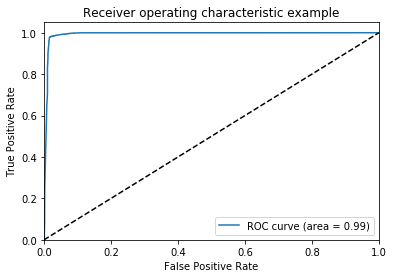

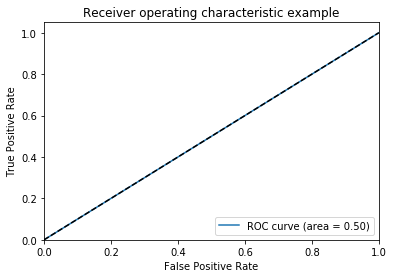

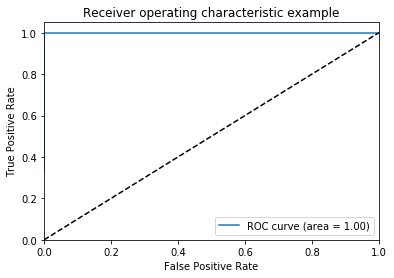

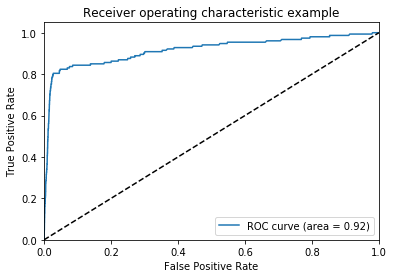

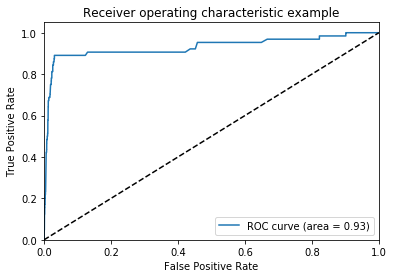

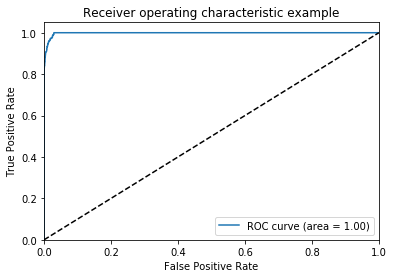

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(7):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

<Figure size 432x288 with 0 Axes>

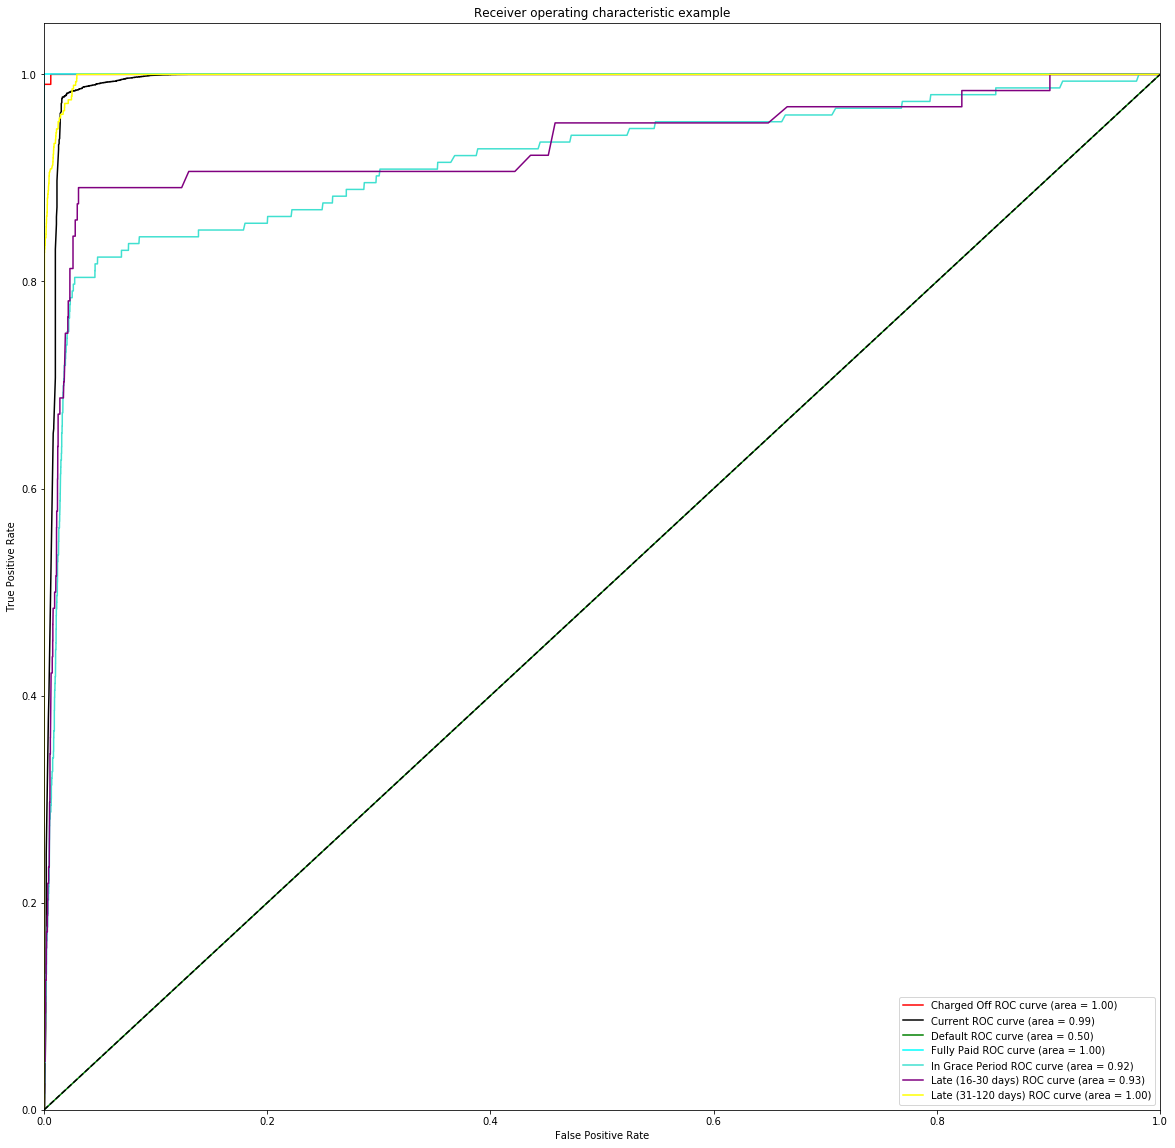

In [16]:
labels = ['Charged Off','Current','Default','Fully Paid','In Grace Period','Late (16-30 days)','Late (31-120 days)']
plt.figure()
color=['red','black','green','cyan','turquoise','purple','yellow']
fig, ax=plt.subplots(figsize = (20,20))
for i in range(7):
    plt.plot(fpr[i], tpr[i], label= '{} ROC curve (area = %0.2f)'.format(labels[i]) % roc_auc[i],color=color[i])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

plt.show()
fig.savefig('Gradient Boosting DT ROC.png')